In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Assumptions in multilinear regression
1. Linearity
2. Homoscedasticity
3. Multivariate normality
4. Independence of error
5. Lack of multicollinearity

In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


1. Extracting the variables
----

In [3]:
X = data.iloc[:,0:4].values
Y = data.iloc[:,4].values

2. Handling the categorical data
---

In [4]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [5]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
label = LabelEncoder()
X[:,3] = label.fit_transform(X[:,3])
encoder = OneHotEncoder(categorical_features=[3])
X = encoder.fit_transform(X).toarray()

In [6]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [7]:
# Removal of one column to avoid the dummy variable trap
# Here we will remove the first column
X = X[:,1:6]
pd.DataFrame(X,columns=['California','Florida','R&D','Admin','Marketing']).head()

,California,Florida,R&D,Admin,Marketing
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


Splitting the dataset into training and test set
---

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
# Modelling with training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
Y_pred = regressor.predict(X_test)

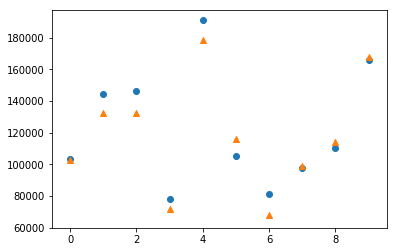

In [11]:
plt.scatter(range(len(Y_test)),Y_test)
plt.scatter(range(len(Y_test)),Y_pred,marker='^')

In [12]:
## adding np.ones at first for intercepts
X1 = np.append(np.ones((len(X),1)),X,axis=1)
pd.DataFrame(X1).head()

,0,1,2,3,4,5
0,1.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,0.0,153441.51,101145.55,407934.54
3,1.0,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,1.0,0.0,142107.34,91391.77,366168.42


In [13]:
import statsmodels.formula.api as smf
regressor = smf.OLS(endog=Y,exog=X1).fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           1.34e-27
Time:                        18:55:11   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Backward elimination : remove the variable with very low significance (with highest p-value)
# variable = Florida
X2 = X1[:,[0,1,3,4,5]]
pd.DataFrame(X2).head()

,0,1,2,3,4
0,1.0,0.0,165349.20,136897.80,471784.10
1,1.0,0.0,162597.70,151377.59,443898.53
2,1.0,1.0,153441.51,101145.55,407934.54
3,1.0,0.0,144372.41,118671.85,383199.62
4,1.0,1.0,142107.34,91391.77,366168.42


In [15]:
# Now fit the model and see the significance level
regressor2 = smf.OLS(endog=Y,exog=X2).fit()
regressor2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           8.49e-29
Time:                        18:55:11   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Now remove X1 from the model which has a very high significance level - variable = california
X3 = X2[:,[0,2,3,4]]
regressor3 = smf.OLS(endog=Y,exog=X3).fit()
regressor3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           4.53e-30
Time:                        18:55:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Now remove X2 from the model which has a very high significance level = variable = Admin
X4 = X3[:,[0,1,3]]
regressor4 = smf.OLS(endog=Y,exog=X4).fit()
regressor4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           2.16e-31
Time:                        18:55:11   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Since our significance level is 0.05 we can remove the variable = Marketing
# Now remove X2 from the model which has a very high significance level = variable = Admin
X5 = X4[:,[0,1]]
regressor5 = smf.OLS(endog=Y,exog=X5).fit()
regressor5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           3.50e-32
Time:                        19:00:22   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**So the left over significant variables are** -  
1. Intercept
2. R&D 
3. Marketing

Text(0,0.5,'Adjusted R2')

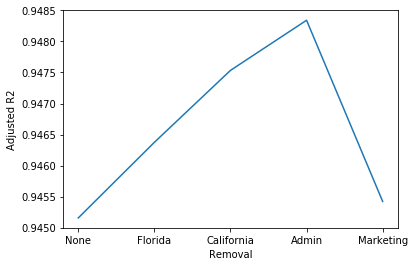

In [28]:
Y_r2_adj = [regressor.rsquared_adj,regressor2.rsquared_adj, regressor3.rsquared_adj,regressor4.rsquared_adj,regressor5.rsquared_adj]
X = ['None','Florida','California','Admin','Marketing']
plt.plot(X,Y_r2_adj)
plt.xlabel('Removal')
plt.ylabel('Adjusted R2')

We can see that the removal of marketing feature from the model has decreased the Adjusted R2 value. Which means that our new model doesnot accurately predict the profits than it would have predicted including the marketing feature in the model